# Importing required libraries

In [17]:
import pandas as pd 
import statistics
from statistics import mean,pstdev
import matplotlib.pyplot as plt
import numpy as np

 # Step-1

In [18]:
# lets first read the data from the excel sheet
df = pd.read_excel("data.xlsx")
table_df = pd.read_excel("table_values.xlsx")
# lets check if the read data is in proper order or not
print(df)
print(table_df)

    no.      1      2      3      4
0     1  15.85  16.02  15.83  15.94
1     2  16.12  16.00  15.85  16.01
2     3  16.00  15.91  15.94  15.83
3     4  16.20  15.85  15.74  15.93
4     5  15.74  15.86  16.21  16.10
5     6  15.94  16.01  16.14  16.03
6     7  15.75  16.21  16.01  15.86
7     8  15.82  15.94  16.02  15.94
8     9  16.04  15.98  15.83  15.98
9    10  15.64  15.86  15.94  15.89
10   11  15.83  15.21  16.58  15.85
11   12  15.85  16.37  16.36  16.12
12   13  15.94  16.29  16.65  16.00
13   14  15.74  16.22  15.60  16.20
14   15  16.21  16.17  16.38  15.74
15   16  16.14  15.46  15.66  15.94
16   17  16.01  16.45  15.71  15.75
17   18  16.02  15.99  16.65  15.82
18   19  15.83  15.74  15.99  16.04
19   20  15.94  16.43  15.21  15.64
     n     A2     D3     D4
0    2  1.880  0.000  3.266
1    3  1.023  0.000  2.574
2    4  0.729  0.000  2.281
3    5  0.577  0.000  2.114
4    6  0.483  0.000  2.003
5    7  0.419  0.076  1.924
6    8  0.373  0.137  1.863
7    9  0.337  0.184

# Step-2

In [19]:
# Count the no.of Rows and store it in the count_row
# Here the shape[0] gives the no.of rows in the data sheet.

count_row = df.shape[0]
# Count the no.of columns and store it in the count_col
# Here the shape[1] gives the no.of columns .
# since the columns starts with '0' we substract '1' from the count

count_col = df.shape[1]-1
# Let's check the no.of columns is read correctly

print("No.of Observations: ",count_col)
# Let's read the table values required for the calculation of quality check
A2 = table_df.iloc[count_col-2,1]
D3 = table_df.iloc[count_col-2,2]
D4 = table_df.iloc[count_col-2,3]
# Let's check  if the tablular values are readed correctly
print("VALUE OF A2: ",A2)
print("VALUE OF D3: ",D3)
print("VALUE OF D4: ",D4)

No.of Observations:  4
VALUE OF A2:  0.729
VALUE OF D3:  0.0
VALUE OF D4:  2.281


# Step-3

In [20]:
# create a list to store the means and ranges of all the observations 
mean_ls=[]
range_ls=[]
# Let's store the values of mean and range of samples ito the created lists
for i in range(count_row):
    row = df.iloc[i,1:]
    range_ls.append(row.max()-row.min())
    mean_ls.append(row.mean())

# Step-4

In [21]:
# The mean values stored are rounded to decimal of 5 in form of string
mean_str_rounded_ls = [ '%.5f' % elem for elem in mean_ls ]
# The string is converted into list of numerics of float values
integer_map = map(float,mean_str_rounded_ls)
mean_rounded_ls = list(integer_map)

# Step-5

In [22]:
# The range values stored are rounded to decimal of 5 in form of string
range_str_rounded_ls = [ '%.5f' % elem for elem in range_ls ]
# The string is converted into list of numerics of float values
integer_mapp = map(float,range_str_rounded_ls)
range_rounded_ls = list(integer_mapp)

# Step-6

In [23]:
# Let's calculate the the mean to all the means of observations
meanchart_control_limit = round(mean(mean_rounded_ls),5)
# Let's check the mean of all the means of observations
print("\nMEAN-CHART CONTROL LIMIT: ",meanchart_control_limit)
# Let's calculate the the mean to all the range of observations
rangechart_control_limit = round(mean(range_rounded_ls),5)
# Let's check the range of all the means of observations
print("\nRANGE-CHART CONTROL LIMIT: ",rangechart_control_limit)


MEAN-CHART CONTROL LIMIT:  15.96862

RANGE-CHART CONTROL LIMIT:  0.528


# Step-7

In [24]:
# Calculate standard deviation 
m_sd = statistics.pstdev(mean_rounded_ls)
# Let's calculate the Upper Control Limit for mean using the formula
m_upper_control_limit = meanchart_control_limit + A2*rangechart_control_limit
# Let's calculate the Lower Control Limit using for mean the formula
m_lower_control_limit = meanchart_control_limit - A2*rangechart_control_limit
# Lets's check the 'UCL' and 'LCL' values
print("\nMEAN-CHART UPPER CONTROL LIMIT: ",m_upper_control_limit)
print("MEAN-CHART LOWER CONTROL LIMIT: ",m_lower_control_limit)


MEAN-CHART UPPER CONTROL LIMIT:  16.353532
MEAN-CHART LOWER CONTROL LIMIT:  15.583708


# Step-8

In [25]:
# Calculate standard deviation 
r_sd = statistics.pstdev(range_rounded_ls)
# Let's calculate the Upper Control Limit for range using the formula
r_upper_control_limit = D4*rangechart_control_limit
# Let's calculate the Lower Control Limit for range 
r_lower_control_limit = D3*rangechart_control_limit
# Lets's check the 'UCL' and 'LCL' values
print("\nRANGE-CHART UPPER CONTROL LIMIT: ",r_upper_control_limit)
print("RANGE-CHART LOWER CONTROL LIMIT: ",r_lower_control_limit)


RANGE-CHART UPPER CONTROL LIMIT:  1.204368
RANGE-CHART LOWER CONTROL LIMIT:  0.0


# Step-9

In [26]:
# Let's store the means of observations in a array of 'm_arr' to plot the graph
m_arr = np.array(mean_rounded_ls)
# Let's store the 'UCL' to plot on the graph in a array named 'm_uc_arr'
m_uc_arr = np.ones(len(mean_rounded_ls))*m_upper_control_limit
# Let's store the 'LCL' to plot on the graph in a array named 'm_lc_arr'
m_lc_arr = np.ones(len(mean_rounded_ls))*m_lower_control_limit
# Let's store the 'CL' to plot on the graph in a array named 'm_c_arr'
m_c_arr = np.ones(len(mean_rounded_ls))*meanchart_control_limit

# Step-10

In [27]:
# Let's store the ranges of observations in a array of 'r_arr' to plot the graph
r_arr = np.array(range_rounded_ls)
# Let's store the 'UCL' to plot on the graph in a array named 'r_uc_arr'
r_uc_arr = np.ones(len(range_rounded_ls))*r_upper_control_limit
# Let's store the 'LCL' to plot on the graph in a array named 'r_lc_arr'
r_lc_arr = np.ones(len(range_rounded_ls))*r_lower_control_limit
# Let's store the 'CL' to plot on the graph in a array named 'r_c_arr'
r_c_arr = np.ones(len(range_rounded_ls))*rangechart_control_limit

# Step-11

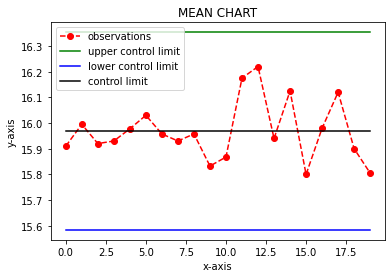

In [28]:
# Let's plot the graph according to the values we calculated
# Plot means of observations
plt.plot(m_arr, marker='o', linestyle='--', color='r', label='observations') 
# Plot 'UCL' on the graph
plt.plot(m_uc_arr,linestyle='-',color='g', label='upper control limit') 
# Plot 'LCL' on the graph
plt.plot(m_lc_arr,linestyle='-', color='b', label='lower control limit') 
# Plot 'CL' on the graph
plt.plot(m_c_arr,linestyle='-', color='black', label='control limit') 
plt.xlabel('x-axis')
plt.ylabel('y-axis') 
plt.title('MEAN CHART')
plt.legend() 
plt.show()

# Step-12

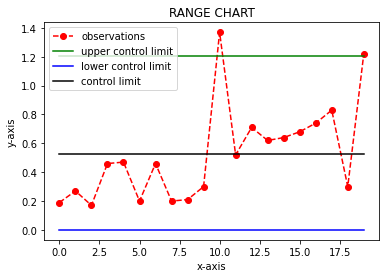

In [29]:
# Let's plot the graph according to the values we calculated
# Plot ranges of observations
plt.plot(r_arr, marker='o', linestyle='--', color='r', label='observations') 
# Plot 'UCL' on the graph
plt.plot(r_uc_arr,linestyle='-',color='g', label='upper control limit') 
# Plot 'LCL' on the graph
plt.plot(r_lc_arr,linestyle='-', color='b', label='lower control limit') 
# Plot 'CL' on the graph
plt.plot(r_c_arr,linestyle='-', color='black', label='control limit') 
plt.xlabel('x-axis')
plt.ylabel('y-axis') 
plt.title('RANGE CHART')
plt.legend() 
plt.show()
